归一化前y_train
 [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1] 


归一化 y_train: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1] 


归一化后,独热编码y_train: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 

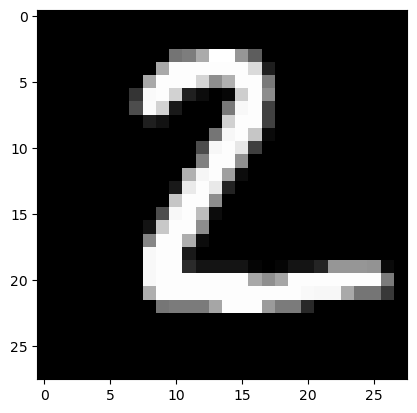

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# 归一化
print("归一化前y_train\n",y_train[0:100],"\n")
# 独热编码 
# y_train=to_categorical(y_train,num_classes=10)
# print("\n归一化前,独热编码y_train:",y_train[0:100],"\n")


x_train=x_train/255.0
x_test=x_test/255.0

# y_train=y_train/255.0
# y_test=y_test/255.0

print("\n归一化 y_train:",y_train[0:100],"\n")

y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

print("\n归一化后,独热编码y_train:",y_train[0:100],"\n")
# print(x_test[1],"\n")
# print(y_train[0:100])
import matplotlib.pyplot as plt
plt.imshow(x_test[1],cmap="gray")

In [99]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.optimizers import RMSprop

In [100]:
model = Sequential(name="FCN-Net")
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=10,activation="softmax"))
model.summary()

Model: "FCN-Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 64)                50240     
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dense_55 (Dense)            (None, 10)                330       
                                                                 
Total params: 53,706
Trainable params: 53,706
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=RMSprop())

In [102]:
model_info=model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=16,
          validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test)
print (accuracy)

Epoch 1/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.3017 - accuracy: 0.9110 - val_loss: 0.1720 - val_accuracy: 0.9478
Epoch 2/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1546 - accuracy: 0.9551 - val_loss: 0.1518 - val_accuracy: 0.9595
Epoch 3/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1222 - accuracy: 0.9662 - val_loss: 0.1500 - val_accuracy: 0.9640
Epoch 4/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1064 - accuracy: 0.9705 - val_loss: 0.1335 - val_accuracy: 0.9678
Epoch 5/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0954 - accuracy: 0.9748 - val_loss: 0.1497 - val_accuracy: 0.9693
Epoch 6/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0882 - accuracy: 0.9774 - val_loss: 0.1582 - val_accuracy: 0.9662
Epoch 7/10
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0789 - accuracy: 0.9797 - val_loss: 0.1485 - val_accuracy:

[0.911020815372467, 0.9550625085830688, 0.9662083387374878, 0.9704791903495789, 0.9748125076293945, 0.9773958325386047, 0.979729175567627, 0.9806041717529297, 0.9822083115577698, 0.9835208058357239]


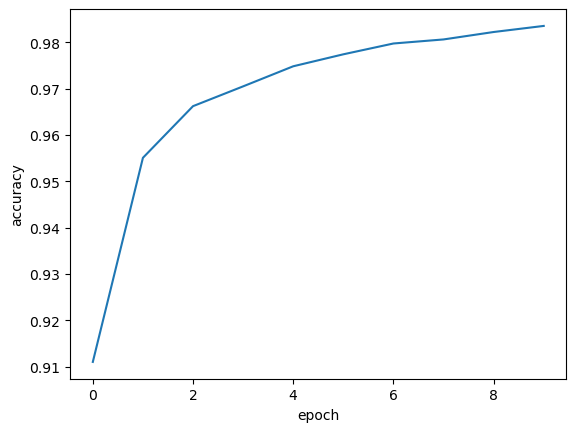

In [103]:
import matplotlib.pyplot as plt
y=model_info.history["accuracy"]
print(y)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(range(0,len(model_info.history["accuracy"])),y)
plt.show()